## Useful Resources

[Return rows with values that contain or match a string](https://davidhamann.de/2017/06/26/pandas-select-elements-by-string/)  

In [0]:
%%capture

!pip install hdbscan
!pip install dbscan

In [0]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import time
import datetime
import warnings

from sklearn.preprocessing import LabelEncoder, StandardScaler, Normalizer, RobustScaler
from sklearn.metrics import mean_squared_log_error
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
import string

import lightgbm as lgb

sns.set(style='white', context='notebook',palette='deep')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

import tensorflow as tf

import nltk.classify.util
from nltk.classify import NaiveBayesClassifier
import nltk

import itertools

from pylab import rcParams

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import norm
from scipy.stats import skew
from scipy import stats
from scipy.stats.stats import pearsonr
from collections import Counter

warnings.filterwarnings('ignore')
#tf.logging.set_verbosity(tf.logging.INFO)
%matplotlib inline

from sklearn.manifold import TSNE
from sklearn import cluster
from sklearn.preprocessing import StandardScaler
#import dbscan
import hdbscan

import spacy
from spacy import displacy
from collections import Counter
import en_core_web_sm

In [0]:
def get_data(file_name,sheet_name):
  df = pd.read_csv(file_name)
  df.dropna(axis=0,inplace=True)
  
  return [df,df.shape,df.head()]


def get_company_names(df,data):
  co_names = []
  for cd in data:
    try:
      cd_attributes = nlp(str(cd))
      ents_list = [ee for ee in cd_attributes.ents if ee.label_ == 'ORG']
      co_names.append(ents_list[0])
      #print(ents_list[0])

    except IndexError as e:
      print(e)
      co_names.append(np.nan)
    except KeyError as e:
      print(e)
      co_names.append(np.nan)

  return co_names

In [0]:
def get_data(file_name,sheet_name):
  df = pd.read_csv(file_name)
  df.dropna(axis=0,inplace=True)
  
  return [df,df.shape,df.head()]


import nltk
import string
import re
nltk.download('stopwords')
nltk.download('punkt')

stopwords = nltk.corpus.stopwords.words('english')

WNL = nltk.WordNetLemmatizer()
ps = nltk.PorterStemmer()

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk import word_tokenize

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer

def clean_text_data(text):
  text_only = re.sub(r'\d+','',text)
  letters_only = re.sub('[^a-zA-Z]',' ',text_only)
  words = letters_only.lower().split()
  stopwords_eng = set(stopwords.words('english'))
  useful_words = [x for x in words if not x in stopwords_eng]
  return useful_words
  
  # combine words into a paragraph again
  useful_words_string = ' '.join(useful_words)
  #return(useful_words_string)

  stemmer = PorterStemmer()
  stemmed_words = [stemmer.stem(word) for word in useful_words_string]

  tokens = word_tokenize(stemmed_words)
  stems = stem_words(tokens, stemmer)
  
  return stems

# text preprocessing option 2
def clean_text(text):
    stop_words = set(stopwords.words('english'))
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    tokens = re.split('\W+', text)
    text = [ps.stem(word) for word in tokens if word not in stop_words]
    return text


def clean_document(doco):
    stop_words = set(stopwords.words('english'))
    punctuation = string.punctuation
    punc_replace = ''.join([' ' for s in punctuation])
    doco_link_clean = re.sub(r'http\S+', '', doco)
    doco_clean_and = re.sub(r'&\S+', '', doco_link_clean)
    doco_clean_at = re.sub(r'@\S+', '', doco_clean_and)
    doco_clean = doco_clean_at.replace('-', ' ')
    doco_alphas = re.sub(r'\W +', ' ', doco_clean)
    trans_table = str.maketrans(punctuation, punc_replace)
    doco_clean = ' '.join([word.translate(trans_table) for word in doco_alphas.split(' ')])
    doco_clean = doco_clean.split(' ')
    p = re.compile(r'\s*\b(?=[a-z\d]*([a-z\d])\1{3}|\d+\b)[a-z\d]+', re.IGNORECASE)
    doco_clean = ([p.sub("", x).strip() for x in doco_clean])
    doco_clean = [word.lower() for word in doco_clean if len(word) > 2]
    doco_clean = ([i for i in doco_clean if i not in stop_words])
#     doco_clean = [spell(word) for word in doco_clean]
#     p = re.compile(r'\s*\b(?=[a-z\d]*([a-z\d])\1{3}|\d+\b)[a-z\d]+', re.IGNORECASE)
    doco_clean = ([p.sub("", x).strip() for x in doco_clean])
#     doco_clean = ([spell(k) for k in doco_clean])
    return doco_clean

def spacy_clean_text(text):
  import string
  import spacy
  from spacy.lang.en.stop_words import STOP_WORDS

  nlp = spacy.load('en_core_web_sm')
  punctuations = string.punctuation
  texts_list = []

  text = nlp(text,disable=['parser','ner'])
  tokens = [tok.lemma_.lower().strip() for tok in text if tok.lemma_ != '-PRON-']
  tokens = [tok for tok in tokens if tok not in STOP_WORDS and tok not in punctuations]
  tokens = ' '.join(tokens)
  texts_list.append(tokens)
  return pd.Series(texts_list)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [0]:
df1 = pd.read_csv('/content/Combined Tiingo Company Descriptions.csv',encoding='latin1')

In [0]:
df2 = pd.DataFrame(df1.iloc[:,:6])
df2.head()

,ticker,description,endDate,exchangeCode,name,startDate
0,1,"Ping An Bank Co., Ltd. is a commercial bank of...",4/22/2019,SHE,Ping An Bank Company Ltd,8/30/2007
1,2,"China Vanke Co., Ltd. is a China-based company...",4/22/2019,SHE,China Vanke Company Ltd,1/4/2000
2,4,"SHENZHEN CAU TECHNOLOGY CO., LTD is primarily ...",4/22/2019,SHE,Shenzhen Cau Technology Company Ltd,8/31/2007
3,5,SHENZHEN FOUNTAIN CORPORATION is principally e...,4/22/2019,SHE,Shenzhen Fountain Corp,1/2/2001
4,6,"Shenzhen Zhenye (Group) Co.,Ltd. is principall...",4/22/2019,SHE,Shenzhen Zhenye Group Company Ltd,1/2/2018


In [0]:
df2.info()
pd.isnull(df2).sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12672 entries, 0 to 12671
Data columns (total 6 columns):
ticker          12670 non-null object
description     11219 non-null object
endDate         11343 non-null object
exchangeCode    11093 non-null object
name            12531 non-null object
startDate       11343 non-null object
dtypes: object(6)
memory usage: 594.1+ KB


ticker             2
description     1453
endDate         1329
exchangeCode    1579
name             141
startDate       1329
dtype: int64

In [0]:
df2['description'] = np.where(df2['description'] == df2['name'],np.nan,df2['description'])

df2.dropna(axis=0,inplace=True)
df2['description'] = df2['description'].apply(lambda x: x.lower())
df2['description'] = np.where(df2['description'] == 'no description available',np.nan,df2['description'])
df2['description'] = np.where(df2['description'].str.contains('delisted') == True,np.nan,df2['description'])

#df2['description'] = df2['description'].apply(lambda x: x.capitalize())

# Remove numbers
df2['description'] = df2['description'].apply(lambda x: re.sub(r'\d+','',x))

df2.dropna(axis=0,inplace=True)

In [0]:
df2['description'].shape

(4887,)

In [0]:
# Check for values in the data

#df2[df2['description'].str.contains(r'\d+')]
#df2[df2['description'].str.contains('#')]
#df2[df2['description'].str.match('DELISTED')]

In [0]:
word_freq = pd.Series(' '.join(df2['description']).split()).value_counts()
word_freq[:20]

and            26131
the            20241
in             12130
of             11830
company         8256
as              6303
is              6195
its             5386
a               4800
products        4027
to              3650
,               3588
engaged         2877
for             2640
well            2274
it              2093
principally     1982
co.,            1838
provides        1760
company's       1713
dtype: int64

In [0]:
%%time

nlp = spacy.load('en')

df2['description lemmas'] = df2['description'].apply(lambda x: " ".join([w.lemma_ for w in nlp(x)]))

CPU times: user 1min 46s, sys: 468 ms, total: 1min 46s
Wall time: 1min 47s


In [0]:
%%time

df2['clean_document'] = df2['description lemmas'].apply(lambda x: " ".join([word for word in clean_document(x)]))

CPU times: user 2.27 s, sys: 85 ms, total: 2.35 s
Wall time: 2.35 s


In [0]:
df2[-30:]

,ticker,description,endDate,exchangeCode,name,startDate,description lemmas,clean_document
12558,CNIGO,corning natural gas holding corp % pfd ser a,4/22/2019,OTCMKTS,Corning Natural Gas Holding Corp 6 Pfd Ser A,9/28/2017,corn natural gas hold corp % pfd ser a,corn natural gas hold corp pfd ser
12559,CNIGP,corning natural gas holding corp .% pfd conv s...,4/16/2019,OTCMKTS,Corning Natural Gas Holding Corp 48 Pfd Conv S...,11/23/2016,corn natural gas hold corp .% pfd conv ser b,corn natural gas hold corp pfd conv ser
12560,CNIT,"china information technology, inc., an interne...",6/4/2018,NASDAQ,"China Information Technology, Inc",9/12/2006,"china information technology , inc . , an inte...",china information technology inc internet serv...
12563,CNK,cinemark is a leading domestic and internation...,4/23/2019,NYSE,Cinemark Holdings Inc,4/24/2007,cinemark be a lead domestic and international ...,cinemark lead domestic international motion pi...
12569,CNLHO,connecticut light & power company .% pfd,3/27/2019,PINK,Connecticut Light Power Company 450 pfd 56,10/11/2017,connecticut light & power company .% pfd,connecticut light power company pfd
12571,CNLK,cannalink inc,4/22/2019,PINK,Cannalink Inc,7/16/2007,cannalink inc,cannalink inc
12577,CNLPL,conn lt & pwr $. pfd g,4/22/2019,PINK,Conn Lt Pwr 324 Pfd G,6/6/2013,conn lt & pwr $ . pfd g,conn pwr pfd
12579,CNLTL,the connecticut light and power company (cl&p)...,4/22/2019,PINK,Connecticut Light and Power Company,7/23/2007,the connecticut light and power company ( cl&p...,connecticut light power company regulate elect...
12582,CNMD,conmed is a medical technology company that pr...,4/23/2019,NASDAQ,CONMED Corp,3/26/1990,conme be a medical technology company that pro...,conme medical technology company provide surgi...
12586,CNMVF,canoe mining ventures corp - ordinary shares,4/12/2019,PINK,Canoe Mining Ventures Corp Ordinary Shares,1/19/2018,canoe mining venture corp - ordinary share,canoe mining venture corp ordinary share


In [0]:
from gensim.models import Phrases

In [0]:
%%time

bigram_model = Phrases(df2['clean_document'])
trigram_model = Phrases(bigram_model[df2['clean_document']])

CPU times: user 6.1 s, sys: 3.95 ms, total: 6.1 s
Wall time: 6.1 s


In [0]:
bigram_model.save('bigram_model_1')
bigram_model = Phrases.load('bigram_model_1')

trigram_model.save('trigram_model_1')
trigram_model = Phrases.load('trigram_model_1')

# Example for deploying bigram model on data
#bigram_model[df2['description_clean_text'][0]]

In [0]:
trigram_model[bigram_model[df2['clean_document']]]

['bank ltd commercial bank offer financial service corporate individual client throughout china pron involve deposit loan settlement exchange local currency acceptance discount local currency note trust business issuance trading local security trade non trade settlement business issuance act issuance foreign security deposit remittance trading business foreign exchange credit investigation consultation witness business spot transaction purchase leasing gold well bank relate business august company change pron name shenzhen development bank ltd bank ltd',
 'china vanke ltd china base company principally engage property development business company mainly develop commodity housing provide property management service year end december company sell approximately million square meter property company investment region consist guangshen region include guangzhou shenzhen dongguan foshan zhuhai xiaman beije region include beijing tianjin tangshan shenyang dalian changchun qingdao shanghai regi

In [0]:
df2['trigram_text'] = trigram_model[bigram_model[df2['clean_document']]]

In [0]:
df2['full name'] = df2['name']+" ("+df2['ticker']+")"
df2

,ticker,description,endDate,exchangeCode,name,startDate,description lemmas,clean_document,trigram_text,full name
0,1,"ping an bank co., ltd. is a commercial bank of...",4/22/2019,SHE,Ping An Bank Company Ltd,8/30/2007,"pe an bank co. , ltd . be a commercial bank of...",bank ltd commercial bank offer financial servi...,bank ltd commercial bank offer financial servi...,Ping An Bank Company Ltd (1)
1,2,"china vanke co., ltd. is a china-based company...",4/22/2019,SHE,China Vanke Company Ltd,1/4/2000,"china vanke co. , ltd . be a china - base comp...",china vanke ltd china base company principally...,china vanke ltd china base company principally...,China Vanke Company Ltd (2)
2,4,"shenzhen cau technology co., ltd is primarily ...",4/22/2019,SHE,Shenzhen Cau Technology Company Ltd,8/31/2007,"shenzhen cau technology co. , ltd be primarily...",shenzhen cau technology ltd primarily engage r...,shenzhen cau technology ltd primarily engage r...,Shenzhen Cau Technology Company Ltd (4)
3,5,shenzhen fountain corporation is principally e...,4/22/2019,SHE,Shenzhen Fountain Corp,1/2/2001,shenzhen fountain corporation be principally e...,shenzhen fountain corporation principally enga...,shenzhen fountain corporation principally enga...,Shenzhen Fountain Corp (5)
4,6,"shenzhen zhenye (group) co.,ltd. is principall...",4/22/2019,SHE,Shenzhen Zhenye Group Company Ltd,1/2/2018,"shenzhen zhenye ( group ) co.,ltd . be princip...",shenzhen zhenye group ltd principally engage d...,shenzhen zhenye group ltd principally engage d...,Shenzhen Zhenye Group Company Ltd (6)
5,7,"shenzhen zero-seven co., ltd is primarily enga...",4/22/2019,SHE,ShenZhen ZeroSeven Company Ltd,8/31/2007,"shenzhen zero - seven co. , ltd be primarily e...",shenzhen zero seven ltd primarily engage hotel...,shenzhen zero seven ltd primarily engage hotel...,ShenZhen ZeroSeven Company Ltd (7)
6,8,"baolilai investment co.,ltd, guangdong is prim...",4/22/2019,SHE,Baolilai Investment Company Ltd Guangdong,1/3/2000,"baolilai investment co.,ltd , guangdong be pri...",baolilai investment ltd guangdong primarily en...,baolilai investment ltd guangdong primarily en...,Baolilai Investment Company Ltd Guangdong (8)
7,9,"china baoan group co.,ltd is principally engag...",4/22/2019,SHE,China Baoan Group CompanyLtd,1/3/2000,"china baoan group co.,ltd be principally engag...",china baoan group ltd principally engage busin...,china baoan group ltd principally engage busin...,China Baoan Group CompanyLtd (9)
8,10,"beijing shenhuaxin co., ltd. is principally en...",4/22/2019,SHE,Beijing Shenhuaxin Company Ltd,8/31/2007,"beijing shenhuaxin co. , ltd . be principally ...",beijing shenhuaxin ltd principally engage manu...,beijing shenhuaxin ltd principally engage manu...,Beijing Shenhuaxin Company Ltd (10)
9,11,shenzhen properties & resources development (g...,4/22/2019,SHE,Shenzhen Properties Resources Develop,1/2/2018,shenzhen property & resource development ( gro...,shenzhen property resource development group l...,shenzhen property resource development group l...,Shenzhen Properties Resources Develop (11)


### Stop words
Even though we've removed the generic stop words from the document, we want to remove industry specific stop words as well.

In [0]:
common_words = ['product','products','engaged','engage','service','services','solution','solutions','segment','segments','offering','offerings',
                'market','markets','provide','provides','provided','industry','industries','sells','sell','sold','state',
                'states','headquarter','headquarters','headquartered', 'canada', 'california','texas','america','management',
               'manages','manage', 'management','business','businesses','operation','operations','state','states',
                'subsidiary','subsidiaries','approximate','approximately','group','groups','include','including','includes',
                'base','bases','location','locations','use','uses','store','stores','unit','units','item','items',
                'outlet','outlets','offer','offers','process','processes','processing','corporation','corporate','custom',
               'offering','offerings','operate','operations','new york','africa','canada','america','international',
                'manufacture','manufactures','manufacturer','manufacturers','brand','brands','benefit','benefits','customer',
                'customers','industry','industries','firm','firms','commercial','commercials','com','new','speciality',
                'specialities','used','unity','manufacturing','united','produce','produces','operates','operator','industrial',
                'sales','company','companies','europe', 'asia','americas','middle east','sector','sectors','together',
                'operators','production','productions','sale','private','public']

# This is our shortened list of industry related stop words
#my_stop_words = ['pvt','ltd','company','private','corperation','engage','Corperation','bancorp','bancorp, inc','holdings, inc','holdings','group','lp','limited',
#                 'limited','income','inc','Inc','Corp','corp','Ltd','llc','LP','headquartered','trust','co.']

In [0]:
%%time

from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer



count_vect = CountVectorizer(ngram_range=(1,3),stop_words=common_words,analyzer=clean_text)
count_vect_matrix = count_vect.fit_transform(df2['trigram_text'].tolist())

# We use the TfidfTransformer instead of the vectorizer because it doesn't require the lower() = True criteria check
# which causes errors on this dataset
tfidf_transformer = TfidfTransformer()
tfidf_transformer_fit = tfidf_transformer.fit(count_vect_matrix)
tfidf_vect_matrix = tfidf_transformer.fit_transform(count_vect_matrix)

CPU times: user 7.72 s, sys: 77.8 ms, total: 7.79 s
Wall time: 7.8 s


In [0]:
tfidf_vect_matrix.shape

(4887, 17155)

## Finding the optimal min_cluster parameter

In [0]:
min_clusters_size_list = []
n_clusters_list = []
for i in range(2,20,1):
  min_cluster_size = i
  hdbscan_model = hdbscan.HDBSCAN(min_cluster_size)

  hdbscan_model.fit_predict(tfidf_vect_matrix)
  hdbscan_labels = hdbscan_model.labels_

  # NOTE: DBSCAN and HDBSCANautomatically assigns noise with a -1 label
  n_clusters_ = len(set(hdbscan_labels)) - (1 if -1 in hdbscan_labels else 0)
  print()
  print ("\nTotal clusters discovered: %d" % n_clusters_)
  print(f"Min cluster size: {min_cluster_size}")
  print(f"clustered shape: {hdbscan_labels.shape}")
  min_clusters_size_list.append(min_cluster_size)
  n_clusters_list.append(n_clusters_)

array([ -1,  -1,  -1, ...,  -1, 268,  -1])


Total clusters discovered: 337
Min cluster size: 2
clustered shape: (4887,)


array([-1, -1, -1, ..., -1, 71, -1])


Total clusters discovered: 124
Min cluster size: 3
clustered shape: (4887,)


array([-1, -1, -1, ..., -1, 36, -1])


Total clusters discovered: 83
Min cluster size: 4
clustered shape: (4887,)


array([-1, -1, -1, ..., -1, 22, -1])


Total clusters discovered: 55
Min cluster size: 5
clustered shape: (4887,)


array([0, 0, 0, ..., 0, 0, 0])


Total clusters discovered: 2
Min cluster size: 6
clustered shape: (4887,)


array([0, 0, 0, ..., 0, 0, 0])


Total clusters discovered: 2
Min cluster size: 7
clustered shape: (4887,)


array([1, 1, 1, ..., 1, 1, 1])


Total clusters discovered: 3
Min cluster size: 8
clustered shape: (4887,)


array([0, 0, 0, ..., 0, 0, 0])


Total clusters discovered: 2
Min cluster size: 9
clustered shape: (4887,)


array([ 0, -1, -1, ...,  0,  0, -1])


Total clusters discovered: 2
Min cluster size: 10
clustered shape: (4887,)


array([ 0, -1, -1, ...,  0,  0, -1])


Total clusters discovered: 2
Min cluster size: 11
clustered shape: (4887,)


array([-1, -1, -1, ..., -1, -1, -1])


Total clusters discovered: 13
Min cluster size: 12
clustered shape: (4887,)


array([-1, -1, -1, ..., -1, -1, -1])


Total clusters discovered: 13
Min cluster size: 13
clustered shape: (4887,)


array([-1, -1, -1, ..., -1, -1, -1])


Total clusters discovered: 13
Min cluster size: 14
clustered shape: (4887,)


array([-1, -1, -1, ..., -1, -1, -1])


Total clusters discovered: 12
Min cluster size: 15
clustered shape: (4887,)


array([-1, -1, -1, ..., -1, -1, -1])


Total clusters discovered: 10
Min cluster size: 16
clustered shape: (4887,)


array([-1, -1, -1, ...,  0, -1, -1])


Total clusters discovered: 10
Min cluster size: 17
clustered shape: (4887,)


array([-1, -1, -1, ..., -1, -1, -1])


Total clusters discovered: 10
Min cluster size: 18
clustered shape: (4887,)


array([-1, -1, -1, ..., -1, -1, -1])


Total clusters discovered: 8
Min cluster size: 19
clustered shape: (4887,)


In [0]:
cluster_stats_df = pd.DataFrame([min_clusters_size_list,n_clusters_list])
cluster_stats_df = cluster_stats_df.T
cluster_stats_df['min_cluster_size'] = cluster_stats_df[0]
cluster_stats_df['number_of_clusters_discovered'] = cluster_stats_df[1]
cluster_stats_df.drop([0,1],axis=1,inplace=True)

In [0]:
cluster_stats_df.index = cluster_stats_df['min_cluster_size']

In [0]:
cluster_stats_df

,min_cluster_size,number_of_clusters_discovered
min_cluster_size,,
2,2,337
3,3,124
4,4,83
5,5,55
6,6,2
7,7,2
8,8,3
9,9,2
10,10,2


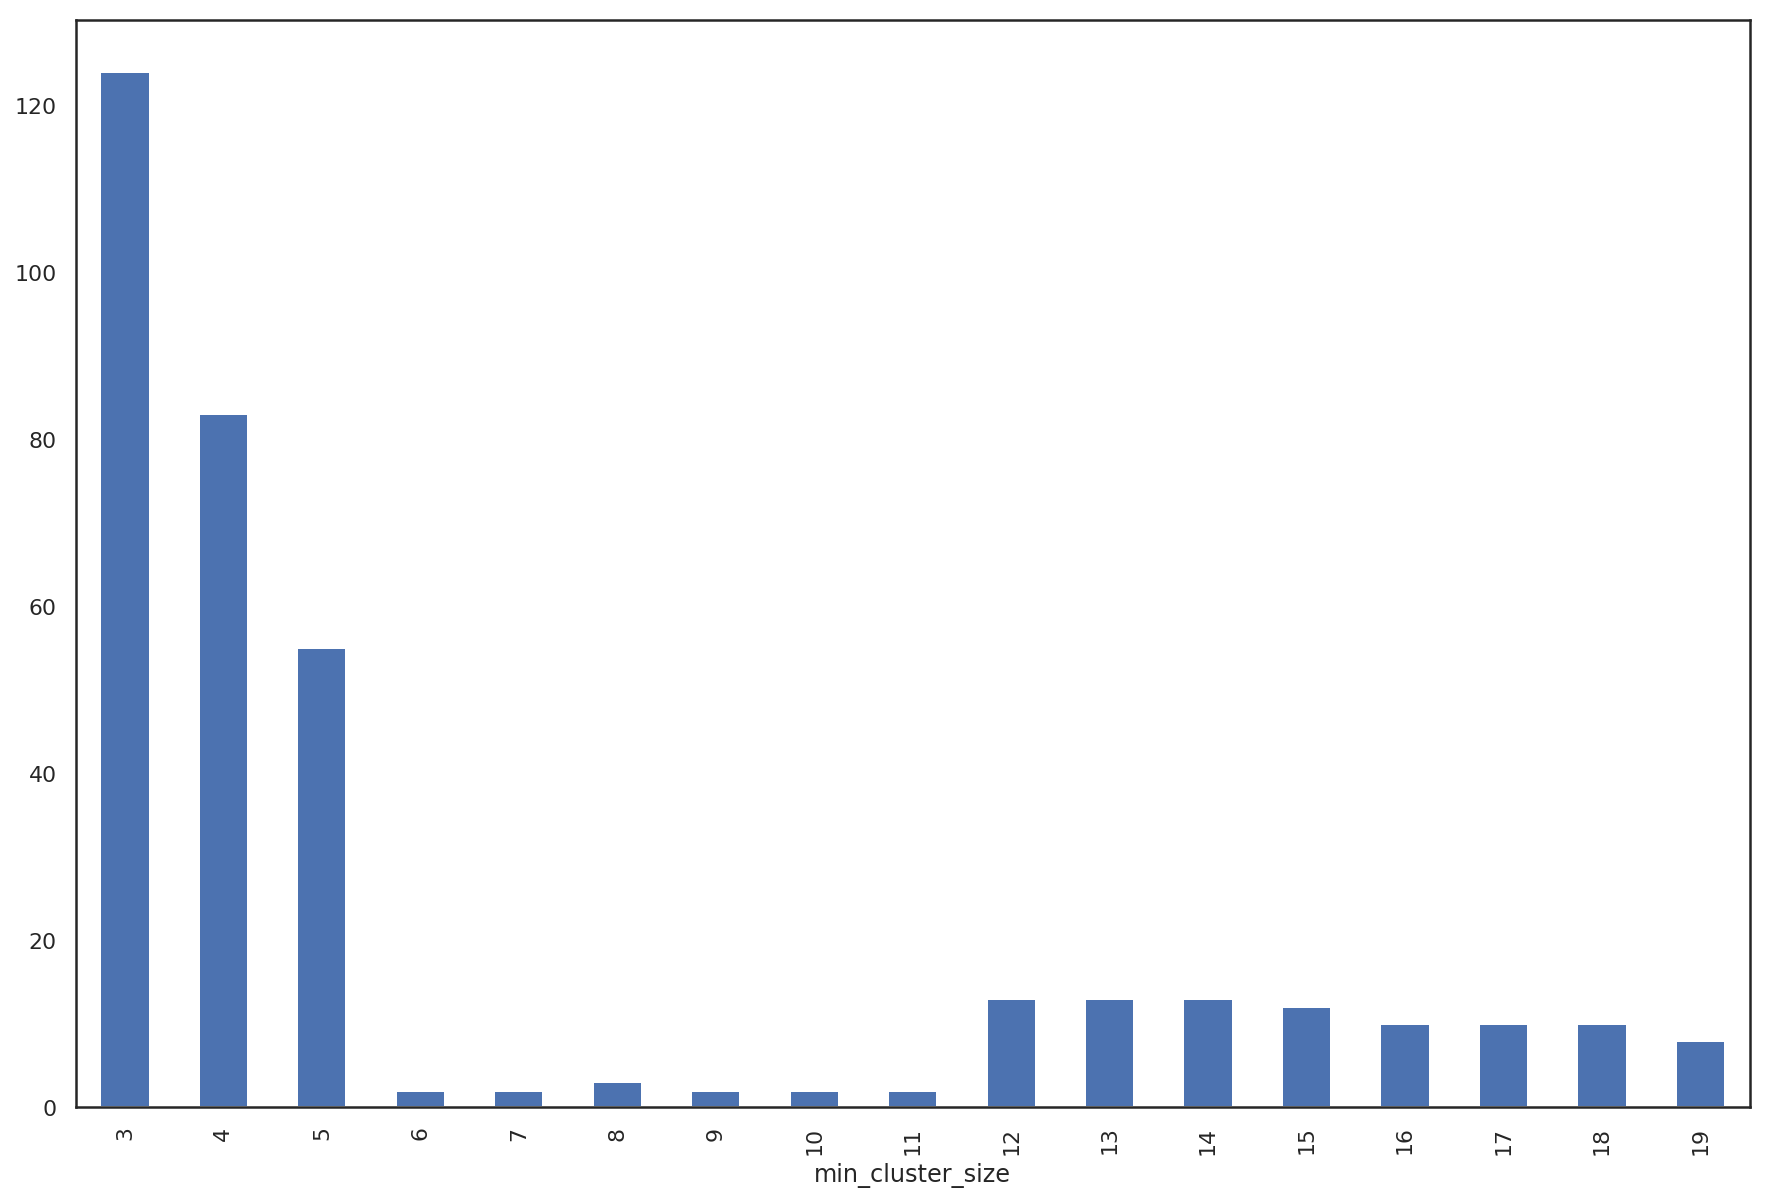

In [0]:
fig, ax = plt.subplots(figsize=(15,10))

cluster_stats_df['number_of_clusters_discovered'].iloc[1:].plot(kind='bar',ax=ax)

## Training and deploying the model

In [0]:
min_cluster_size = 5
hdbscan_model = hdbscan.HDBSCAN(min_cluster_size)

hdbscan_model.fit_predict(tfidf_vect_matrix)
hdbscan_labels = hdbscan_model.labels_

# NOTE: DBSCAN and HDBSCANautomatically assigns noise with a -1 label
n_clusters_ = len(set(hdbscan_labels)) - (1 if -1 in hdbscan_labels else 0)
print ("\nTotal clusters discovered: %d" % n_clusters_)
print(f"Min cluster size: {min_cluster_size}")

print(f"clustered shape: {hdbscan_labels.shape}")

clustered_series = pd.Series(index=df2['full name'], data=hdbscan_labels.flatten())
clustered_series = clustered_series[clustered_series != -1]

counts = clustered_series.value_counts()
cluster_vis_list = list(counts[counts>2].index[::-1])

clust2 = []

for clust in cluster_vis_list:
    clusts = list(clustered_series[clustered_series==clust].index)
    clust2.append(clusts)

array([-1, -1, -1, ..., -1, 22, -1])


Total clusters discovered: 55
Min cluster size: 5
clustered shape: (4887,)


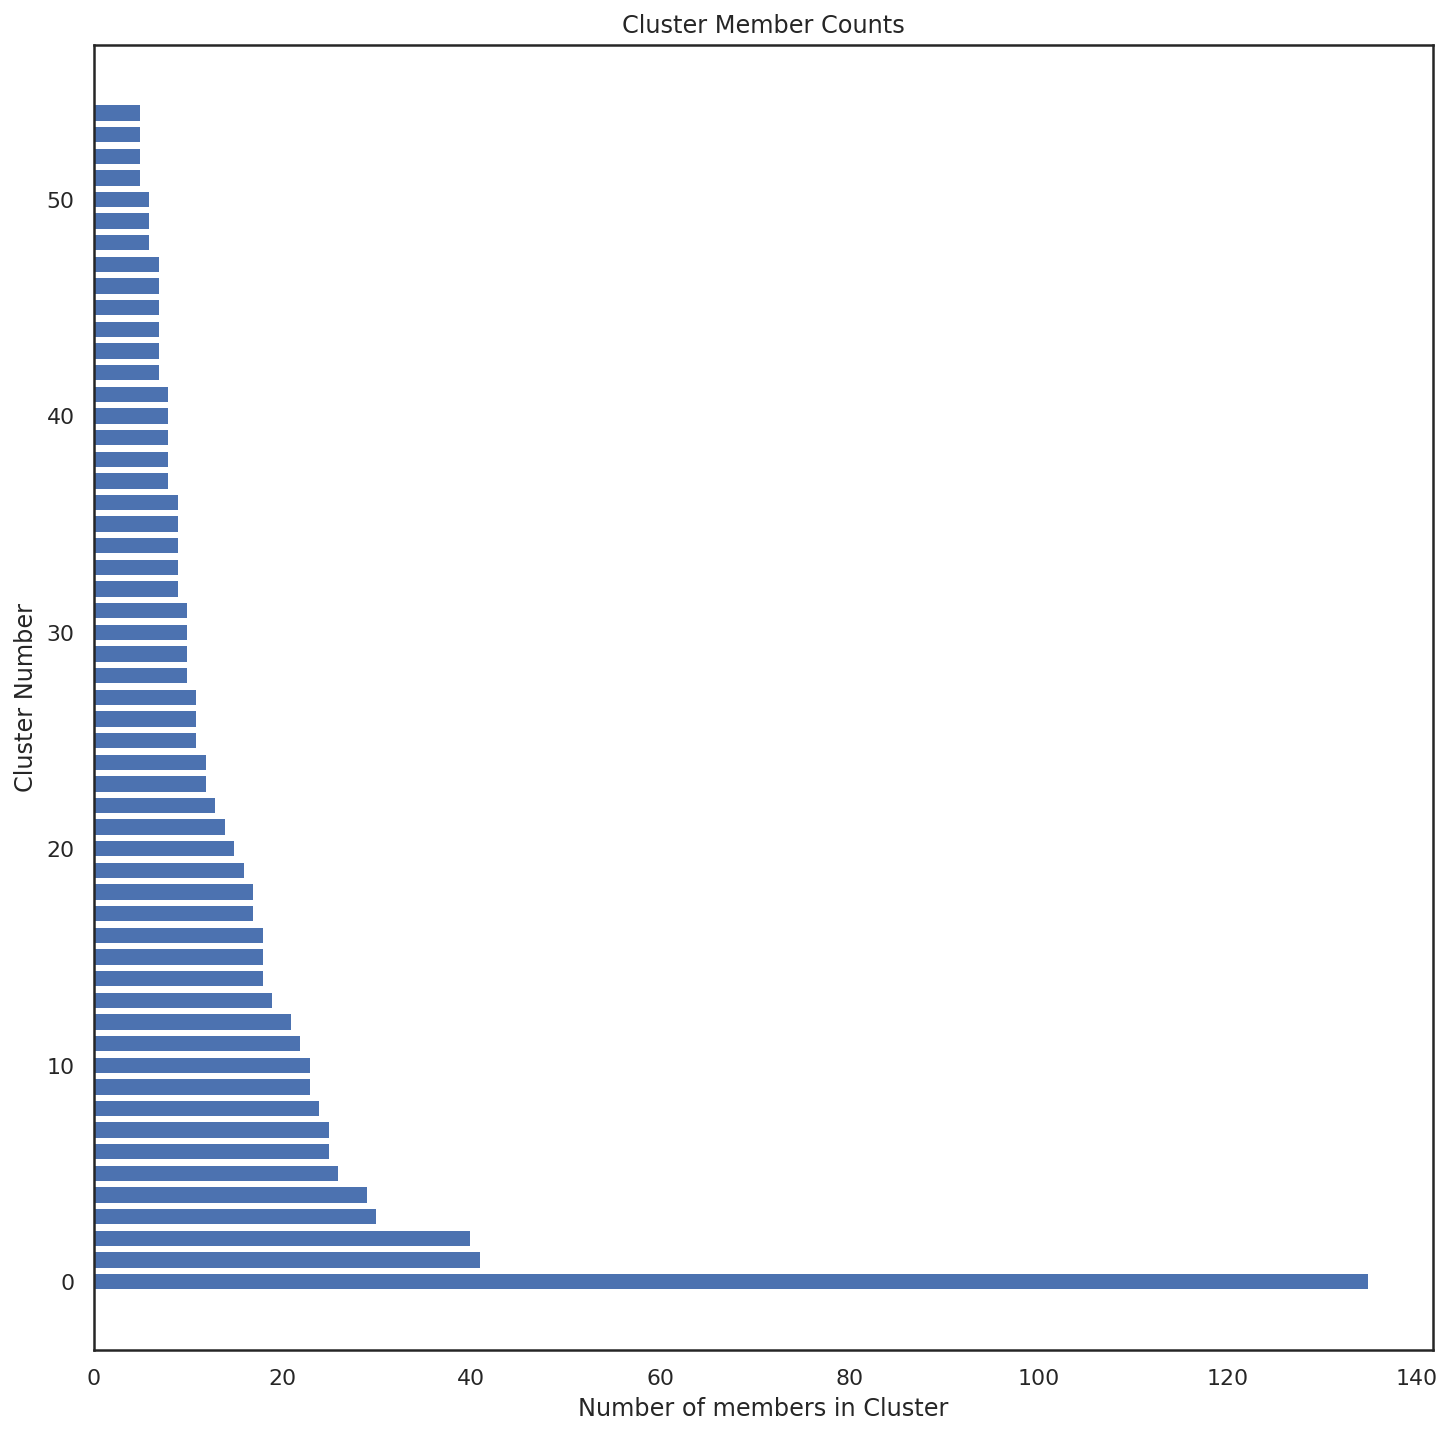

In [0]:
f, ax = plt.subplots(figsize=(12,12))

plt.barh(
    range(len(clustered_series.value_counts())), # Vary x-axis length w/ number of members in our largest cluster.
    clustered_series.value_counts() # This is the y-axis. Plots the number of members in each cluster.
);
plt.title('Cluster Member Counts');
plt.xlabel('Number of members in Cluster');
plt.ylabel('Cluster Number');

In [0]:
clustered_series.value_counts()

26    135
45     41
43     40
30     30
38     29
24     26
49     25
20     25
23     24
27     23
47     23
34     22
19     21
53     19
9      18
51     18
52     18
46     17
33     17
12     16
44     15
36     14
54     13
6      12
39     12
8      11
35     11
32     11
21     10
10     10
1      10
3      10
4       9
18      9
40      9
37      9
29      9
41      8
17      8
14      8
28      8
31      8
42      7
16      7
2       7
13      7
50      7
7       7
5       6
15      6
48      6
11      5
22      5
25      5
0       5
dtype: int64

In [0]:
clust2_df = pd.DataFrame(clust2)
clust2_df.shape
clust2_df.T.shape
clust2_df.T # Transpose the DataFrame so that columns represent the cluster ID

(55, 135)

(135, 55)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54
0,BB Seguridade Participacoes SA (BBSEY),Unisplendour Guhan Group Corporation Ltd (590),Amplify Energy Corp Wt Exp 05042022 (AMPYW),Argentum 47 Inc Ordinary Shares (ARGQ),Shangxi CY Pharmaceutical Company Ltd (300254),Creator Capital Ltd (CTORF),Yantai Longyuan Power Technology CompanyLtd (3...,Xinjiang Western Animal Husbandry Company Ltd ...,Shandong Nanshan Aluminum Company Ltd (600219),Anhui ANLI Artificial Leather Company Ltd (300...,"Cogent, Inc (COGT)",Guangdong Goworld Company Ltd (823),Shenzhen Tellus Holding Company Ltd (25),Hubei Radio and Tlvsn Infrn Ntwrk Company Ltd ...,Canadian Solar Inc (CSIQ),Anhui Leimingkehua Company Ltd (600985),XCMG Construction Machinery Company Ltd (425),Cathay Pacific Airwa (CPCAY),Qwest Corp Pfd (CTY),Anhui Huamao Textile Company Ltd (850),Beijing Zhong Ke San Huan HiTech Company Ltd (...,Cognosec AB ADR Sponsored (CYBNY),Xibei Bearing CompanyLtd (595),Celyad SA (CYAD),Coffeesmiths Collective inc Ordinary Shares (C...,Gui Zhou Tyre Company Ltd (589),Central China Land Media Company Ltd (719),Customers Bancorp Inc FixedtoFloating Rate Non...,Weichai Power Company Ltd (338),Anhui Gujing Distillery Company Ltd (596),PetroChina Jinhong Energy Invstmt Company Ltd ...,Cowen Inc 735 Senior Notes Due 2027 (COWNZ),Guangdong Provincial Expressway Develop (429),Huazhi Holding Zhejiang Company Ltd (607),Sichuan Chemical Company Ltd (155),Shenzhen Desay Battery Tech Company Ltd (49),Digital Realty Trust Inc 6625 Series C Cumulat...,CSG Holding Company Ltd (12),Gansu Jngyn Coal Inds Elctr Pwr Company Ltd (552),Guangzhou Hengyun Enterprises Holding (531),Hunan Zhenghong Science Technology (702),Shenzhen Zhenye Group Company Ltd (6),Shenzhen Zhongjin Lingnan Nfmt Company Ltd (60),Shenzhen Yan Tian Port Holdings Company Ltd (88),Wonders Information Company Ltd (300168),Foshan Electrical and Lighting Company Ltd (541),Northeast Securities Company Ltd (686),Shandong Chenming Paper Holdings Ltd (488),Tangshan Jidong Cement Company Ltd (401),Chaserg Technology Acquisition Corp Units 1 Or...,Huayi Compressor Company Ltd (404),CorEnergy Infrastructure Trust Inc Depositary ...,Shenzhen SDG Information Company Ltd (70),Daye Special Steel Company Ltd (708),Choiceone Financial (COFS)
1,Bionik Laboratories Corp (BNKL),Shanxi Zhendong Pharmaceutical (300158),Basic Energy Services Inc Wt Exp 12232023 (BASWW),Arsanis Inc Ordinary Shares (ASNS),Yabao Pharmaceutical Group Company Ltd (600351),ChangyouCom Ltd ADR (CYOU),WuXi Huaguang Boiler Company Ltd (600475),V V Food and Beverage CompanyLtd (600300),Shanghai Datun Energy Resources Company Ltd (6...,Shanghai Kai Kai Industry Company Ltd (600272),Alcon Inc (ALC),SiChuan GuoDong Construction Company Ltd (600321),Huangshan Jinma CompanyLtd (980),Hengyi Petrochemical Company Ltd (703),China SolarCln (CSOL),Guizhou Jiulian Indust Explv Mat Devt (2037),Shantui Construction Machinery Company Ltd (680),China Southern Airlines Company Ltd (600029),Dynagas LNG Partners LP Pfd Unit Ser B FixedFl...,China Garments Company Ltd (902),Chengdu Galaxy Magnets CompanyLtd (300127),Cyberdyne Inc ADR Sponsored (CYBQY),Xiangyang Automobile Bearing Company Ltd (678),Adaptimmune Therapeutics plc (ADAP),CrowdGather Inc (CRWG),China Enterprises (CSHEF),Chinese Universe PublishingMedia Company Ltd (...,Customers Bancorp Inc FixedtoFloating Rate Non...,Changchai Company Ltd (570),Jiugui Liquor Company Ltd (799),Comstock Resources Inc (CRK),Capitala Finance Corp 575 Convertible Notes Du...,Hainan Haide Industry Company Ltd (567),Sound Environmental Resources Company Ltd (826),Hubei Yihua Chemical Industry Company Ltd (422),CITIC Guoan Information Indust Company Ltd (839),Digital Realty Trust Inc Redeemable Preferred ...,Shijiazhuang Baoshi Electronic Glass Company (...,Inner Mongolia Yuan Xing Energy Company Ltd (683),Guangdong Electric Power

In [0]:
df2['cluster_labels'] = pd.DataFrame(hdbscan_labels.flatten())
df2[1000:1050]

,ticker,description,endDate,exchangeCode,name,startDate,description lemmas,clean_document,trigram_text,full name,cluster_labels
2468,DOCOF,do & company ag,4/15/2019,OTCGREY,Do Company AG,10/13/2017,do & company ag,company,company,Do Company AG (DOCOF),-1.0
2470,DOCU,docusign inc - ordinary shares,4/26/2019,NASDAQ,DocuSign Inc Ordinary Shares,4/27/2018,docusign inc - ordinary share,docusign inc ordinary share,docusign inc ordinary share,DocuSign Inc Ordinary Shares (DOCU),-1.0
2473,DOGEF,dong energy a/s,4/25/2019,PINK,DONG Energy AS,2/8/2017,dong energy a / s,dong energy,dong energy,DONG Energy AS (DOGEF),-1.0
2474,DOGZ,dogness (international) corp,4/26/2019,NASDAQ,Dogness International Corp,12/19/2017,dogness ( international ) corp,dogness international corp,dogness international corp,Dogness International Corp (DOGZ),-1.0
2489,DOOR,masonite international corporation is a leadin...,4/26/2019,NYSE,Masonite International Corp,7/24/2009,masonite international corporation be a lead g...,masonite international corporation lead global...,masonite international corporation lead global...,Masonite International Corp (DOOR),-1.0
2490,DORM,"dorman products, inc. is a leading supplier of...",4/26/2019,NASDAQ,Dorman Products Inc,3/12/1991,"dorman product , inc . be a lead supplier of d...",dorman product inc lead supplier dealer âexc...,dorman product inc lead supplier dealer âexc...,Dorman Products Inc (DORM),-1.0
2498,DOV,dover is a diversified global manufacturer wit...,4/26/2019,NYSE,Dover Corp,7/1/1985,dover be a diversified global manufacturer wit...,dover diversified global manufacturer annual r...,dover diversified global manufacturer annual r...,Dover Corp (DOV),-1.0
2499,DOVA,dova is a pharmaceutical company focused on ac...,4/26/2019,NASDAQ,Dova Pharmaceuticals Inc,6/29/2017,dova be a pharmaceutical company focus on acqu...,dova pharmaceutical company focus acquire deve...,dova pharmaceutical company focus acquire deve...,Dova Pharmaceuticals Inc (DOVA),-1.0
2502,DOW,dow inc when issued,4/26/2019,NYSE,Dow Inc,3/20/2019,dow inc when issue,dow inc issue,dow inc issue,Dow Inc (DOW),-1.0
2503,DOW,dow inc when issued,4/26/2019,NYSE,Dow Inc,3/20/2019,dow inc when issue,dow inc issue,dow inc issue,Dow Inc (DOW),26.0


In [0]:
%%time

X = tfidf_vect_matrix.toarray()
print(X.shape)

(4887, 17155)
CPU times: user 137 ms, sys: 3.02 ms, total: 141 ms
Wall time: 140 ms


In [0]:
import umap

In [0]:
%%time

reducer = umap.UMAP(n_components=2,n_neighbors=30,min_dist=0.0, n_epochs=1000,random_state=1337,learning_rate=1.0,)
embedding = reducer.fit_transform(X)

CPU times: user 1min 43s, sys: 683 ms, total: 1min 44s
Wall time: 1min 43s


CPU times: user 22 ms, sys: 13 ms, total: 35 ms
Wall time: 27.3 ms


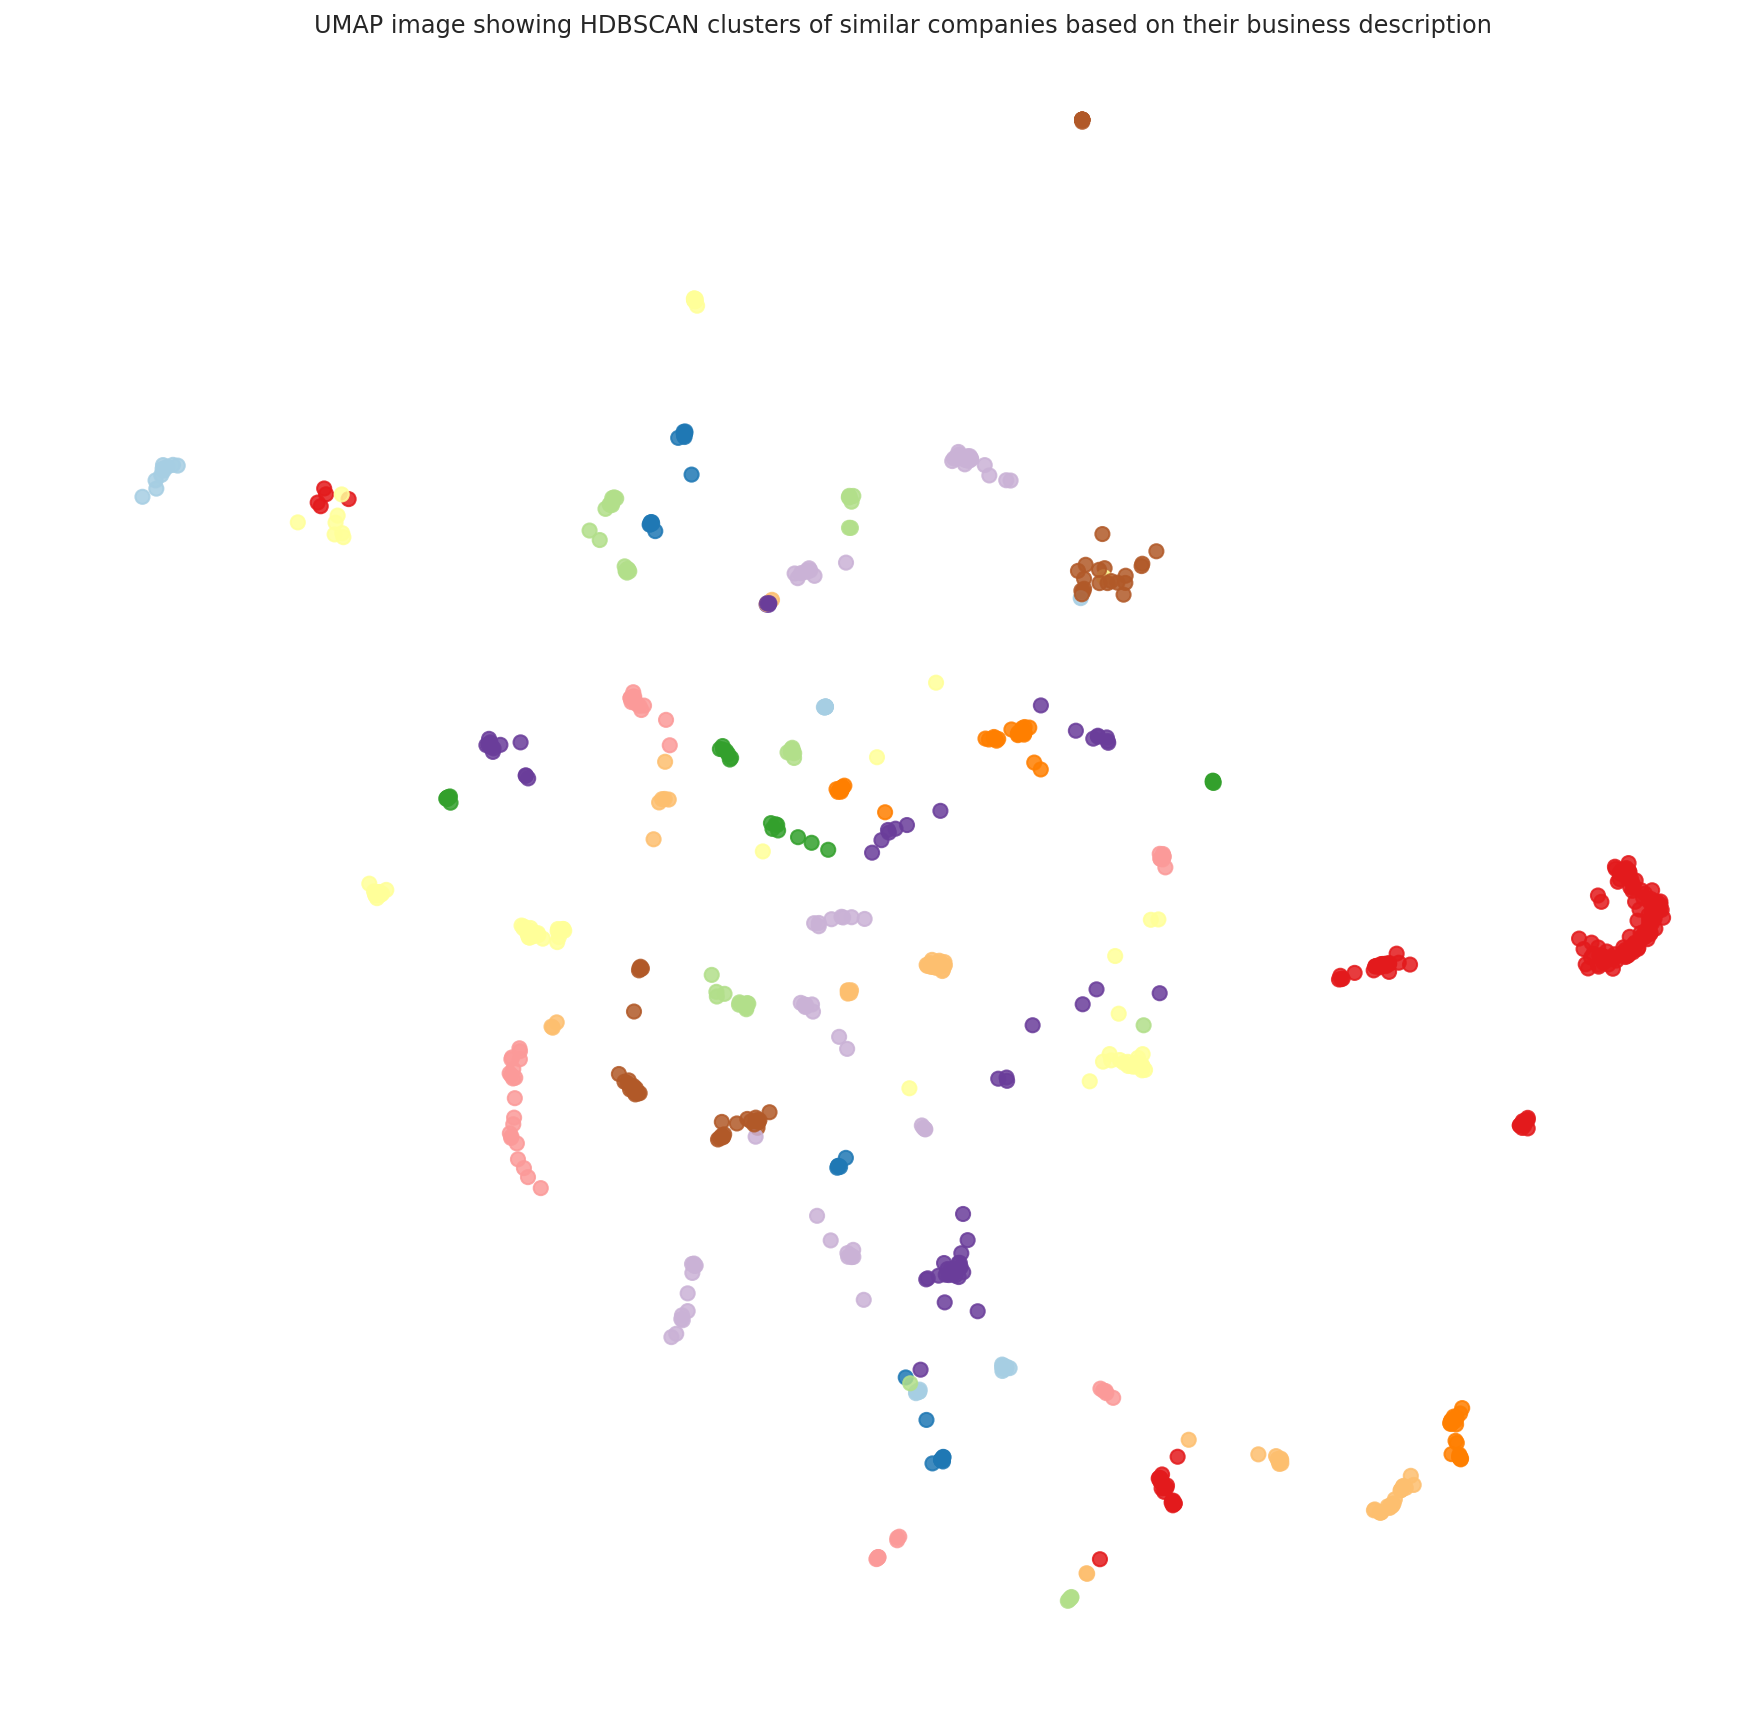

In [0]:
%%time

import matplotlib.cm as cm

plt.figure(1, facecolor='white',figsize=(15,15))
plt.clf()
plt.axis('off')

# let's create a scatter plot for our X_tsne labels from our clusters.
# We'll assign different color codes to each cluster and within our chosen color palette
# and we'll assign similar colors to members that belong to the same cluster.
plt.scatter(
    embedding[(hdbscan_labels != -1),0], # This is x
    embedding[(hdbscan_labels != -1),1], # This is y
    s=50,
    alpha=0.85,
    c=hdbscan_labels[hdbscan_labels !=-1],
    cmap=cm.Paired
)

# plt.scatter(
#     embedding[(clustered_series==-1).values, 0],
#     embedding[(clustered_series==-1).values, 1],
#     s=100,
#     alpha=0.05
# )

plt.title('UMAP image showing HDBSCAN clusters of similar companies based on their business description')

In [0]:
clusterable_embedding = umap.UMAP(
    n_neighbors=30,
    min_dist=0.0,
    n_components=2,
    random_state=42,
).fit_transform(X)

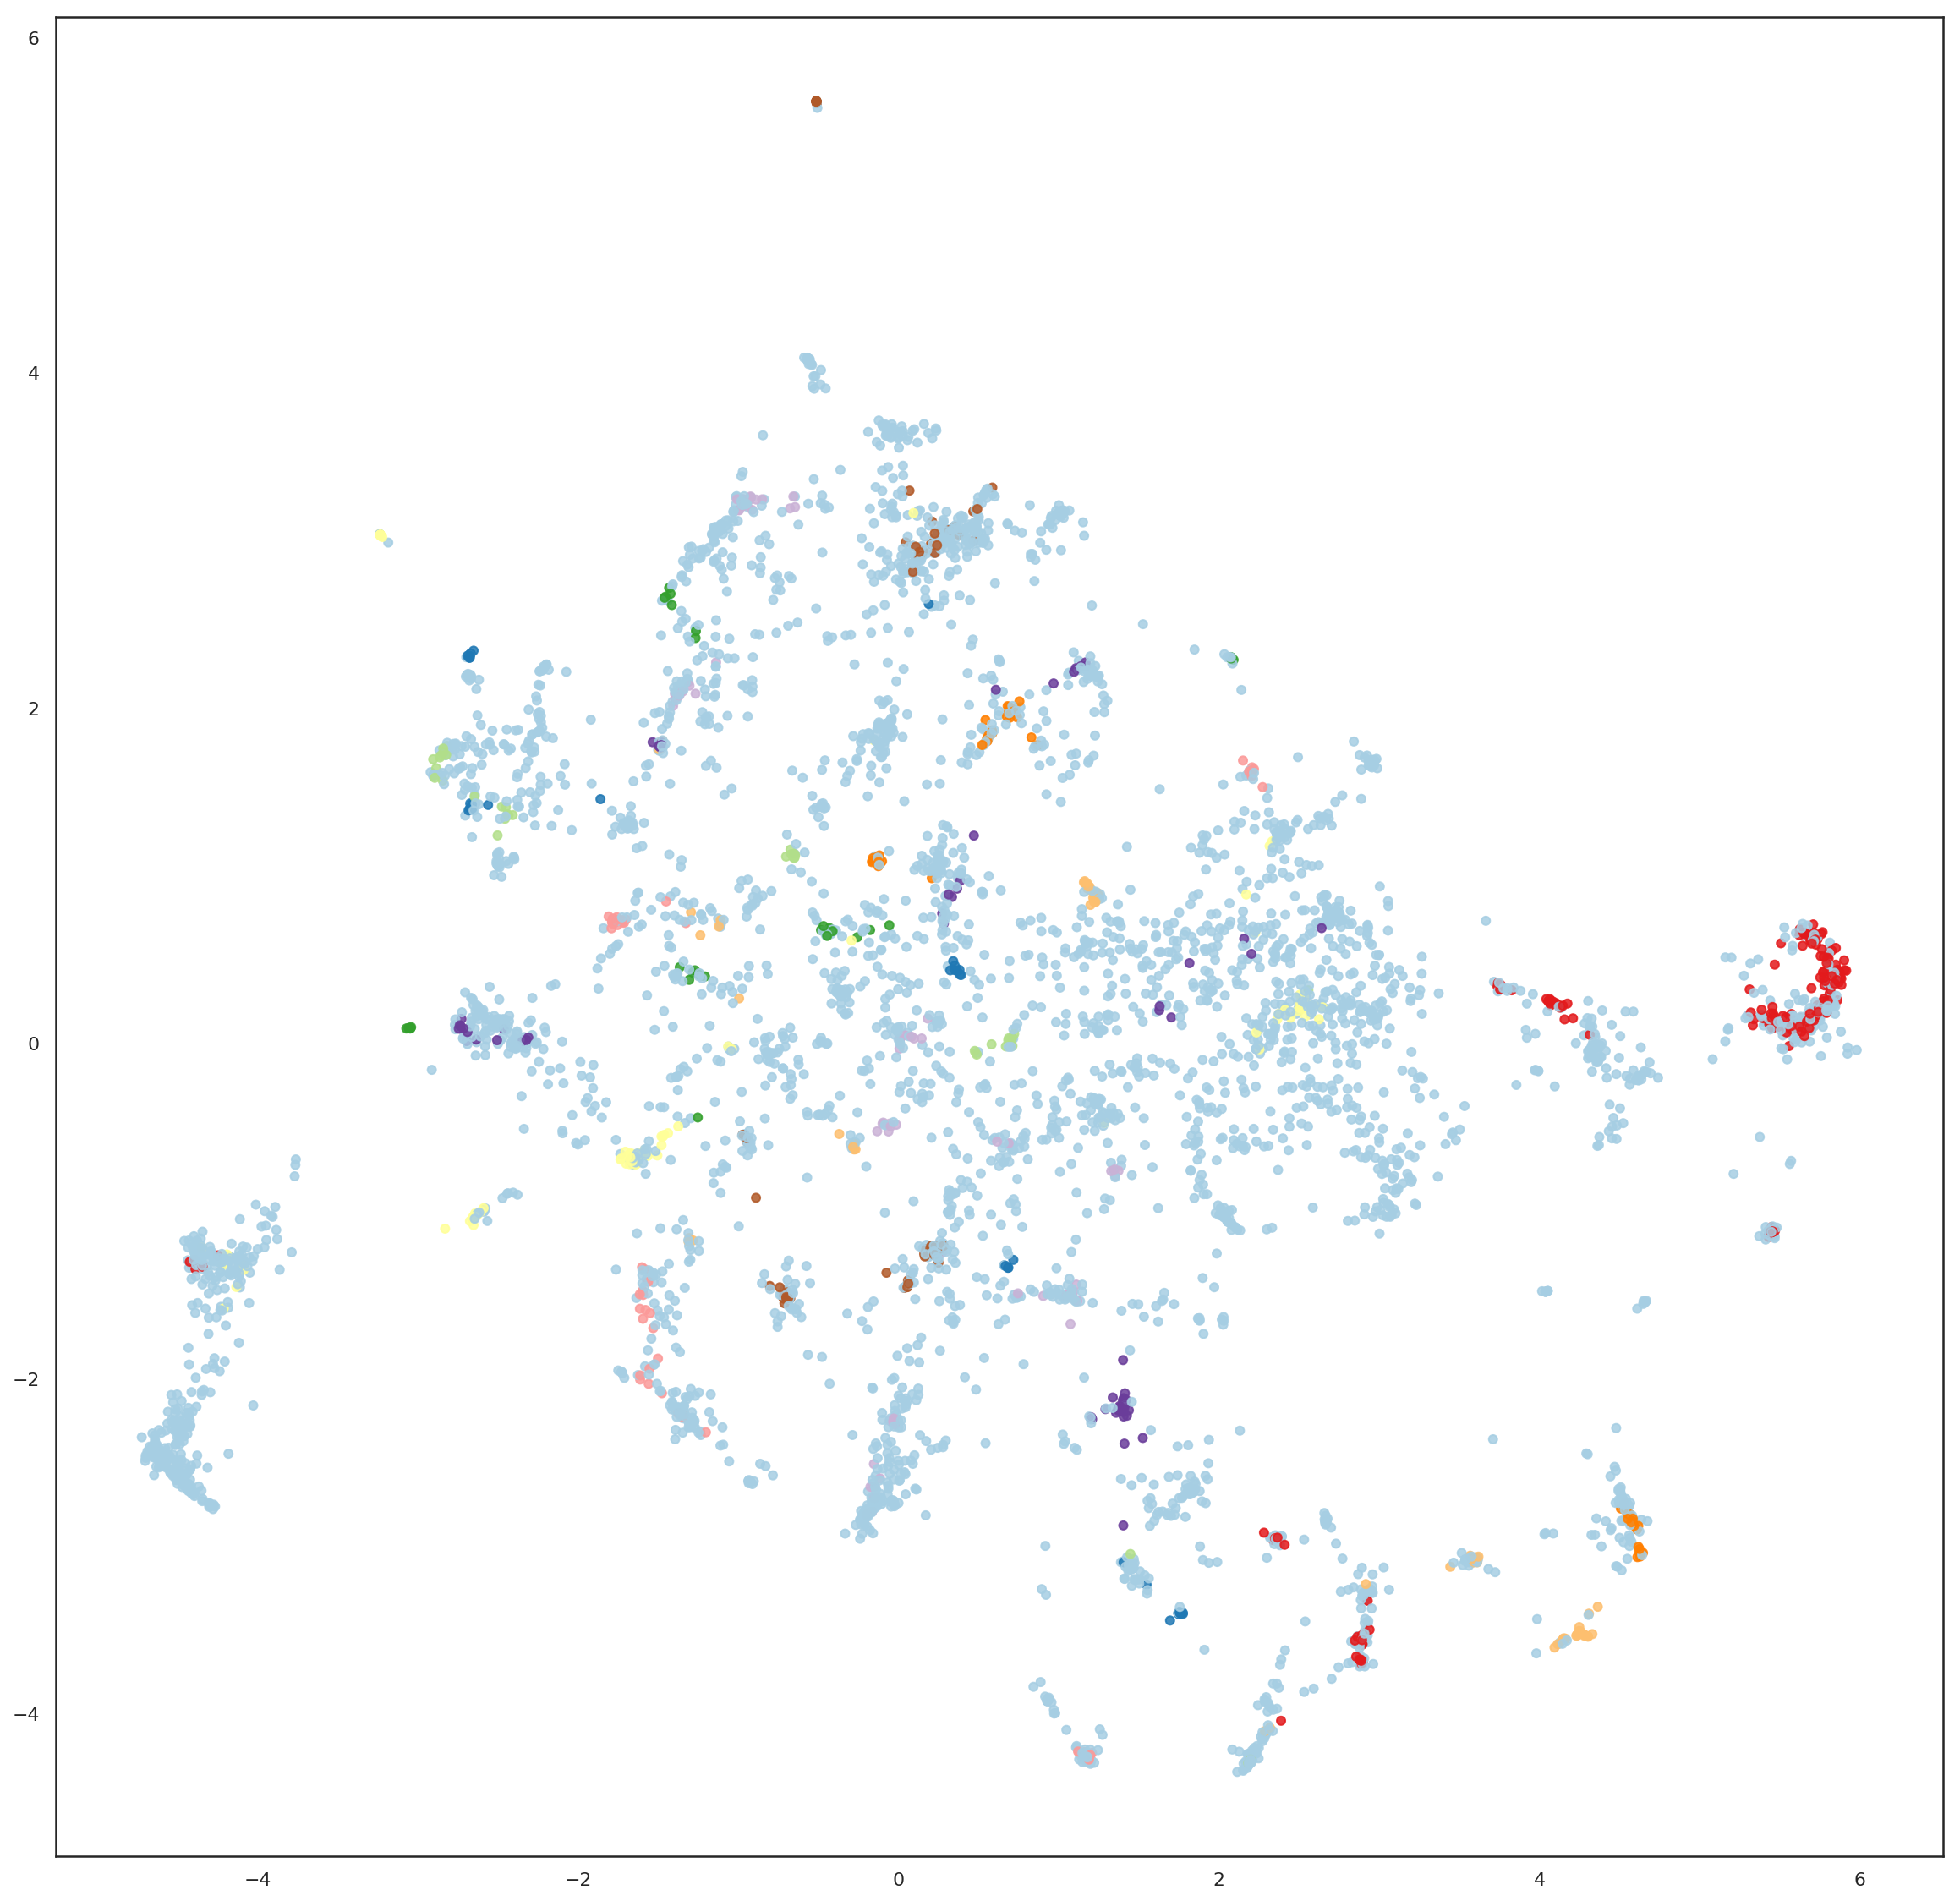

In [0]:
plt.figure(1, facecolor='white',figsize=(20,20))

plt.scatter(clusterable_embedding[:, 0],
            clusterable_embedding[:, 1],
            c=hdbscan_labels,
            s=25,
            alpha=0.85,
            cmap='Paired');

This next cell takes a little while to run depending on the size of your dataset.

We're taking a sparse matrix and converting it into a dense one

CPU times: user 15min 8s, sys: 180 ms, total: 15min 8s
Wall time: 15min 8s


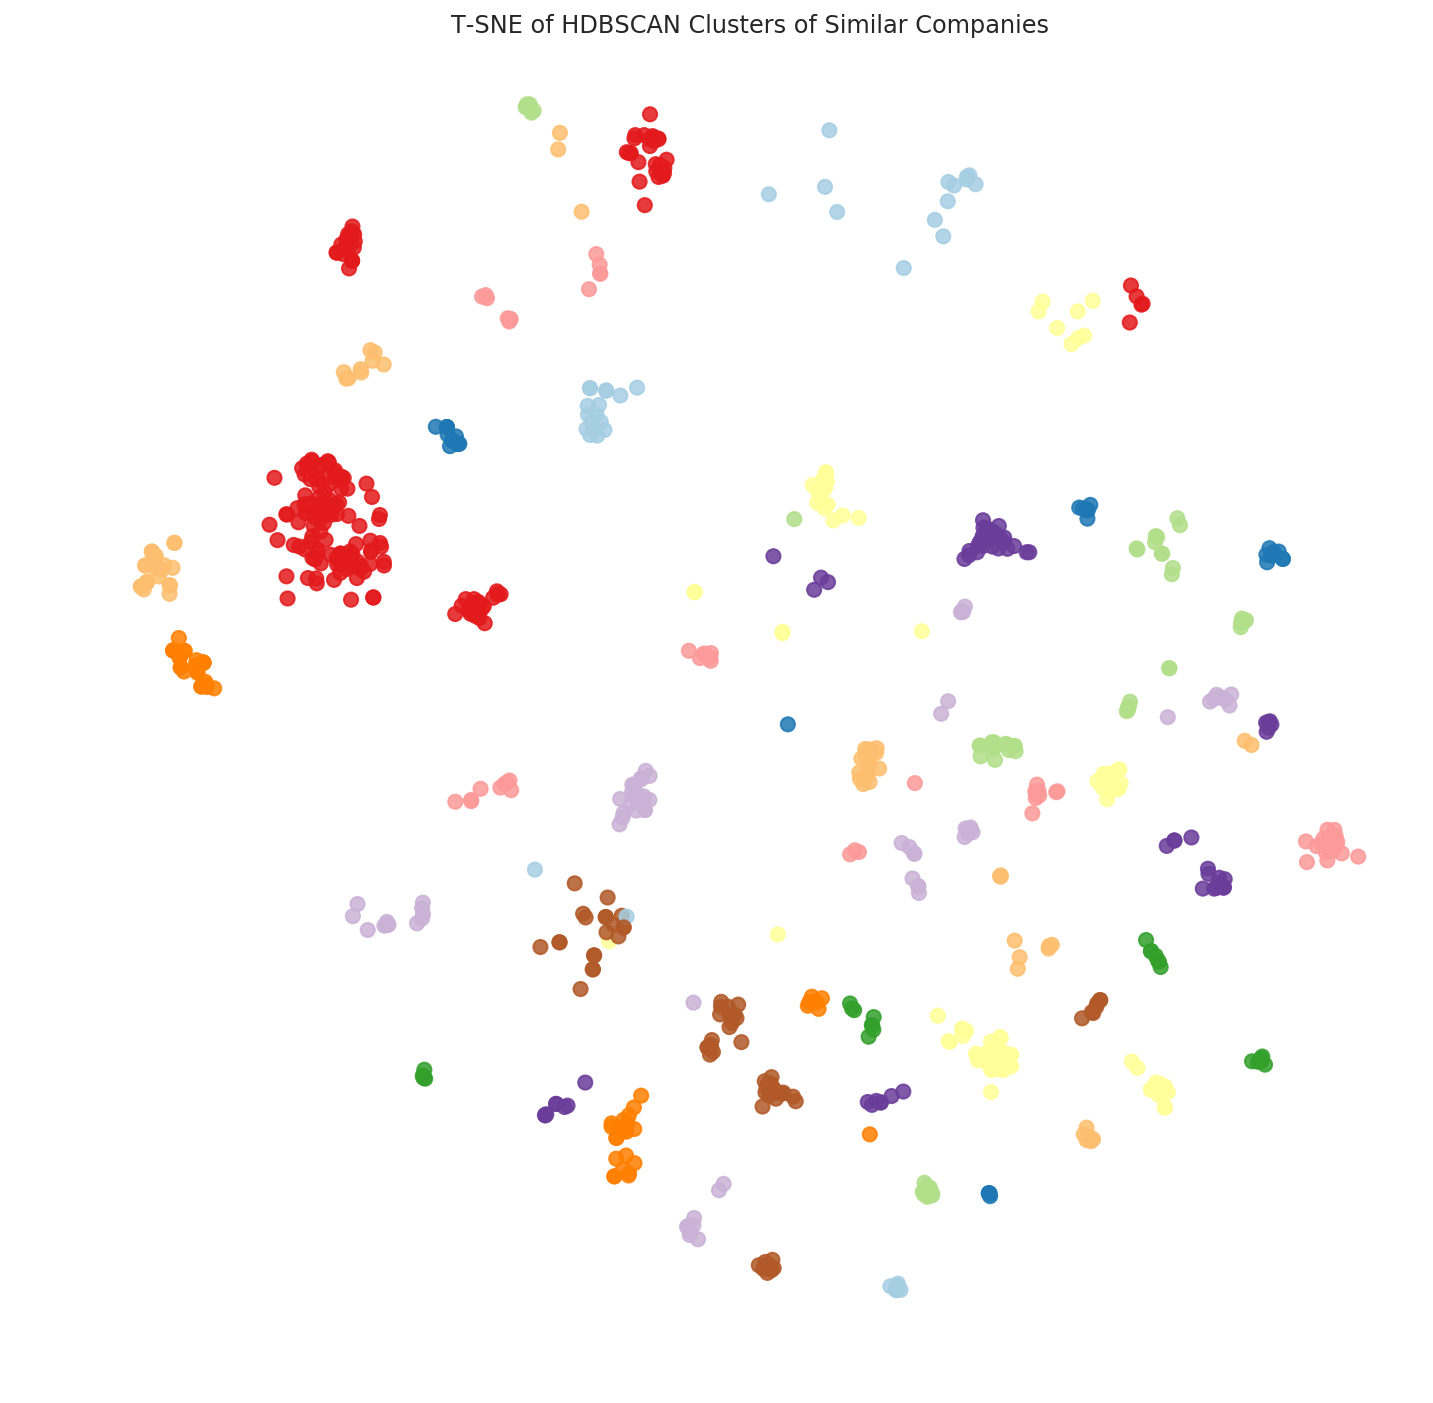

In [0]:
%%time

import matplotlib.cm as cm


X_tsne = TSNE(learning_rate=1000, perplexity=25, random_state=1337).fit_transform(X)

plt.figure(1, facecolor='white',figsize=(12,12))
plt.clf()
plt.axis('off')

# let's create a scatter plot for our X_tsne labels from our clusters.
# We'll assign different color codes to each cluster and within our chosen color palette
# and we'll assign similar colors to members that belong to the same cluster.
plt.scatter(
    X_tsne[(hdbscan_labels!=-1), 0], # This is x
    X_tsne[(hdbscan_labels!=-1), 1], # This is y
    s=50,
    alpha=0.85,
    c=hdbscan_labels[hdbscan_labels!=-1],
    cmap=cm.Paired
)


plt.title('T-SNE of HDBSCAN Clusters of Similar Companies');

In [0]:
# print ("\nTotal clusters discovered: %d" % n_clusters_)
# print(f"Min cluster size: {min_cluster_size}")


Total clusters discovered: 36
Min cluster size: 4
